<a href="https://colab.research.google.com/github/ucfilho/Doubts_Students/blob/master/sorgo_ANN_otimiza_test_jan_26_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
from sklearn.preprocessing import StandardScaler
from google.colab import files
from sklearn.model_selection import train_test_split

In [35]:
n = input('Entre sua escolha (0,1 ou 2) para  (ponta negra, 1g100, dbk550:')
uploaded = files.upload()

Entre sua escolha (0,1 ou 2) para  (ponta negra, 1g100, dbk550:1


Saving Dados 1G100_Pontos novos.xlsx to Dados 1G100_Pontos novos (8).xlsx


In [36]:
choose = ["sorgopontanegra.csv","Sorgo_1G100.csv","Sorgo_DBK550.csv"]
#DAT=pd.read_csv(choose[int(n)])
DAT = pd. read_excel('Dados 1G100_Pontos novos.xlsx')
print(DAT.head())

  Run  SO (g/L)  IN (g/L)  GL (g/L)  Et (g/L)  Ethanol (kg/100kg sorgo)  \
0   1    35.000      15.0   26.4169   12.1970                 34.848571   
1   2    35.000      45.0   27.9425   14.6410                 41.831429   
2   3   165.000      15.0   86.3195   43.6347                 26.445273   
3   4   165.000      45.0   89.0621   43.4471                 26.331576   
4   5    25.445      30.0   18.2450    9.7402                 38.279426   

   Fi (kg/ 100kg de sorgo)       ST         Y1  
0                  29.5200  28.4169  83.995385  
1                  26.4942  28.9425  98.995123  
2                  58.5103  87.9128  97.131251  
3                  52.4981  90.6521  93.791185  
4                  27.0320  21.2450  89.720201  


In [37]:
n

'1'

In [38]:
def zscore(x,xold):
  x = np.array(x)
  xold = np.array(xold)
  nrows, ncol = x.shape
  for j in range(ncol):
    avgx,stdx = np.average(xold[:,j]), np.std(xold[:,j])
    x[:,j]=(x[:,j]-avgx)/stdx
  return x

In [39]:
def z2val(x,xold): 
  x = np.array(x)
  xold = np.array(xold)
  nrows, ncol = x.shape
  for j in range(ncol):
    avgx,stdx = np.average(xold[:,j]), np.std(xold[:,j])
    x[:,j]=x[:,j]*stdx+avgx
  return x

In [40]:
DAT.columns=['Run', 'SO', 'IN', 'GL ', 'Et', 'Et2', 'Fi', 'ST', 'Y1']

In [41]:
Col_Indep=['SO','IN']
#names =[ 'Et']
names =[ 'Y1']

In [42]:
nrows, ncols = DAT.shape
itrain, itest =train_test_split(range(nrows), test_size=0.2,random_state=14) # 2,3,4,5,6,7,8,9,10,11,22

In [43]:
# separa as colunas de interesse
x_train=DAT[Col_Indep].iloc[itrain,:].copy()
y_train=DAT[names].iloc[itrain,:].copy()
x_test = DAT[Col_Indep].iloc[itest,:].copy()
y_test = DAT[names].iloc[itest,:].copy()

In [44]:
xold, yold = DAT[Col_Indep],DAT[names]

In [45]:
x_train, y_train = zscore(x_train,xold), zscore(y_train,yold)
x_test, y_test = zscore(x_test,xold), zscore(y_test,yold)

In [46]:
x_train

array([[ 1.28040331, -1.32787567],
       [-1.22016134,  1.32787567],
       [ 1.28040331,  0.88525045],
       [ 1.46313688,  0.        ],
       [-1.22016134, -1.32787567],
       [ 0.99187662, -0.88525045],
       [ 0.03012098,  0.        ],
       [ 0.03012098,  1.52263077],
       [ 0.03012098, -1.52263077],
       [-1.22016134, -0.88525045],
       [ 0.03012098,  0.        ],
       [-0.16223014, -0.44262522]])

In [47]:
# define a rede neural 
def optmANN(x_train,x_test,y_train,y_test):
  resp_scored = []
  for i in range(1,15):
    r_calc =[]
    N_Hidden = i
    clf = MLPRegressor(solver='lbfgs',activation='tanh',
                      alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                        random_state=1)
    clf.fit(x_train, y_train)
    y_calc_train=clf.predict(x_train)
    y_calc_test=clf.predict(x_test)
    y_calc_train=pd.DataFrame(y_calc_train)
    y_calc_test=pd.DataFrame(y_calc_test)
    r2_test= r2_score(y_test,y_calc_test)
    r2_train = r2_score(y_train,y_calc_train)
    r_calc.append(i)
    r_calc.append(r2_train)
    r_calc.append(r2_test)
    resp_scored.append(r_calc)

  df = pd.DataFrame(resp_scored,columns=['hidden','r2 train','r2 test'])
  return df

In [48]:
df = optmANN(x_train,x_test,y_train,y_test)
df

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
S

,hidden,r2 train,r2 test
0,1,0.383524,-2.823247
1,2,0.595600,-63.616719
2,3,0.929625,-3.077728
3,4,0.929800,-3.052829
4,5,0.998722,-9.472962
5,6,0.998722,-5.193893
6,7,0.998722,-6.599216
7,8,0.998722,-4.601883
8,9,0.998722,-8.411911
9,10,0.998722,-3.602331


In [49]:
# define a rede neural 
N_Hidden= 3
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=3,
             random_state=1, solver='lbfgs')

In [50]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [51]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)

In [52]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train, y_calc_test = z2val(y_calc_train,yold), z2val(y_calc_test,yold)
y_train, y_test = z2val(y_train,yold), z2val(y_test,yold)

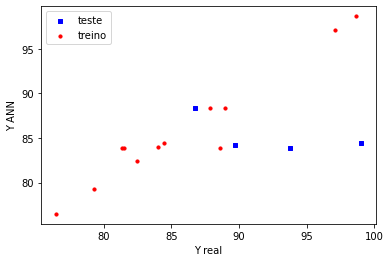

In [53]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Y ANN')
plt.xlabel('Y real')
plt.show()

In [54]:
r2_test= r2_score(y_test,y_calc_test)
r2_train = r2_score(y_train,y_calc_train)
print('r2 (train)=',r2_train)
print('r2 (test)=',r2_test)

r2 (train)= 0.9296245371600738
r2 (test)= -3.0777277032108277


In [55]:
y_calc_train

array([[97.13169363],
       [84.4342267 ],
       [83.84234382],
       [83.82827907],
       [83.99828874],
       [83.84382638],
       [88.39911385],
       [98.64602898],
       [82.46115009],
       [79.27047383],
       [88.39911385],
       [76.48720386]])

In [56]:
y_train

array([[97.13125091],
       [84.44399852],
       [81.37815589],
       [88.61196923],
       [83.99538493],
       [81.48945277],
       [87.85252415],
       [98.64340863],
       [82.46290144],
       [79.26377726],
       [88.98202584],
       [76.48792217]])

In [57]:
DAT

,Run,SO,IN,GL,Et,Et2,Fi,ST,Y1
0,1,35.000,15.0,26.416900,12.197000,34.848571,29.52000,28.416900,83.995385
1,2,35.000,45.0,27.942500,14.641000,41.831429,26.49420,28.942500,98.995123
2,3,165.000,15.0,86.319500,43.634700,26.445273,58.51030,87.912800,97.131251
3,4,165.000,45.0,89.062100,43.447100,26.331576,52.49810,90.652100,93.791185
4,5,25.445,30.0,18.245000,9.740200,38.279426,27.03200,21.245000,89.720201
5,6,174.500,30.0,114.536100,52.465000,30.065903,49.56220,115.866100,88.611969
6,7,100.000,12.8,60.953600,26.523600,26.523600,41.31000,62.943800,82.462901
7,8,100.000,47.2,60.943800,34.969100,34.969100,44.37400,69.373800,98.643409
8,9,100.000,30.0,59.275200,27.666200,27.666200,52.59800,60.845200,88.982026
9,10,100.000,30.0,59.740400,27.505900,27.505900,46.95500,61.270400,87.852524


In [58]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [59]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)


In [60]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
Condicoes= z2val(Condicoes,xold)
resp = pd.DataFrame(Condicoes,columns=Col_Indep)
print(resp)
Y=clf.predict(Condicoes).reshape(-1,1)
Y =  z2val(Y,yold)
print(Y)

          SO         IN
0  68.458405  41.296238
[[83.82508537]]


In [61]:
# separa as colunas de interesse
x_train, y_train = DAT[Col_Indep],DAT[names]
x_train, y_train = zscore(x_train,xold), zscore(y_train,yold)

In [62]:
df = optmANN(x_train,x_train,y_train,y_train)
df

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

,hidden,r2 train,r2 test
0,1,0.268956,0.268956
1,2,0.436845,0.436845
2,3,0.595935,0.595935
3,4,0.810427,0.810427
4,5,0.798114,0.798114
5,6,0.846878,0.846878
6,7,0.846878,0.846878
7,8,0.810765,0.810765
8,9,0.846878,0.846878
9,10,0.846878,0.846878


In [63]:
# define a rede neural 
N_Hidden= 3
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=3,
             random_state=1, solver='lbfgs')

In [64]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [65]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)

In [66]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
Y=clf.predict(Condicoes).reshape(-1,1)

Condicoes= z2val(Condicoes,xold)
resp = pd.DataFrame(Condicoes,columns=Col_Indep)
print(resp)
Y =  z2val(Y,yold)
print(Y)

         SO         IN
0  92.26863  41.296238
[[99.24511821]]
